## Customer Service Requests Analysis.

This project was completed as a part of Simplilearn Data Science with Python course.

In this Project, We will analyze the data on service request (311) calls from New York City by using various python library. We also understand the pattern in the data by utilizing data wrangling techniques and also visualize the major type of complaints.

### Objective

>- To assess the data and prepare a fresh dataset for training
and prediction
>- To plot a bar graph to identify the relationship between
two variables
>- To visualize the major types of complaints in each city

In [ ]:
## import the required Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
import warnings
warnings.filterwarnings('ignore')

---
> - Import the dataset
---

In [3]:
dataFrame = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", parse_dates=['Created Date', 'Closed Date']);

> - Visualize the Dataset

In [4]:
dataFrame.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


> - Print the columns of the DataFrame

In [5]:
dataFrame.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

> -  Identify the shape of the dataset

In [6]:
dataFrame.shape

(364558, 53)

> - Identify the variables with null values

In [7]:
dataFrame.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

> - Print all the other important information about the DataFrame, such as datatype and count

In [8]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

In [9]:
dataFrame.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


# 2. Perform basic data exploratory analysis:
Replace the special characters that are not needed in the DataFrame

In [10]:
dataFrame.columns= dataFrame.columns.str.replace(" ", "_")

In [11]:
dataFrame.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

> - Draw a frequency plot to show the number of null values in each column of the DataFrame

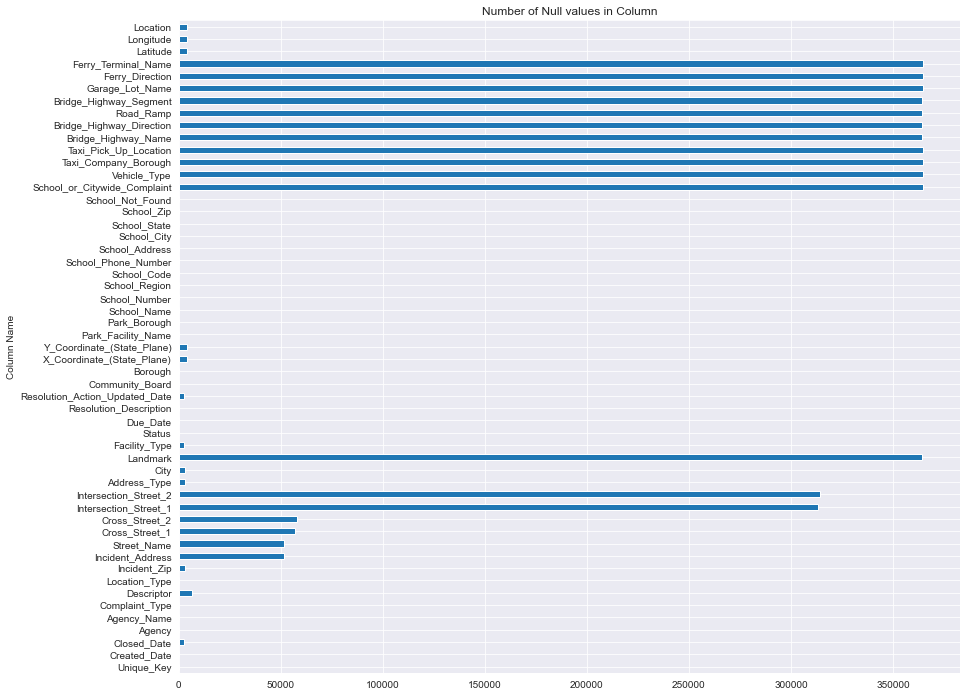

In [12]:
plt.figure(figsize=(14,12))
plt.title("Number of Null values in Column");
dataFrame.isnull().sum().plot(kind='barh', xlabel='Column Name', ylabel='Null Values Count');

### Observations:

> - The bar shows the Null values in the columns
> - Most of the columns, from `Ferry Terminal Name` to `School- or City-wide Complaint` have a very large number of null values


# Missing value Treatment
> - Remove the records whose Closed Date values are null


In [13]:
dataFrame[['Closed_Date', 'Created_Date']].isnull().sum()

Closed_Date     2381
Created_Date       0
dtype: int64

In [14]:
dataFrame = dataFrame[pd.notnull(dataFrame['Closed_Date'])]

> - There are now zero null values in the Closed Date column.

In [15]:
dataFrame[['Closed_Date', 'Created_Date']].isnull().sum()

Closed_Date     0
Created_Date    0
dtype: int64

# 2.3 Analyze the date column, and remove entries that have an incorrect timeline

> - 2.3.1 Calculate the time elapsed in closed and creation date

In [16]:
df_dateTime =(dataFrame.Created_Date[0] - dataFrame.Closed_Date[0] )
df_dateTime.seconds

83070

In [17]:
dataFrame['Request_elapsed_time'] = dataFrame.Closed_Date - dataFrame.Created_Date

> - 2.3.2 Convert the calculated date to seconds to get a better 
representation

In [18]:
dataFrame['Request_elapsed_time'] = dataFrame['Request_elapsed_time']/np.timedelta64(1,'s')

In [19]:
dataFrame['Request_elapsed_time'].head()

0     3330.0
1     5233.0
2    17494.0
3    27927.0
4    12464.0
Name: Request_elapsed_time, dtype: float64

> -  2.3.3 View the descriptive statistics for the newly created column


In [20]:
dataFrame['Request_elapsed_time'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_elapsed_time, dtype: float64

In [21]:
dataFrame.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

> - 2.3.4 Check the number of null values in the Complaint_Type and 
City columns

In [22]:
dataFrame[['Complaint_Type', 'City']].isnull().sum()

Complaint_Type      0
City              674
dtype: int64

*There are around 674 NA Values in the city columns*

> - 2.3.5 Impute the NA value with Unknown City

In [23]:
dataFrame['City'].fillna('Unknown City', inplace=True)

In [24]:
dataFrame[['Complaint_Type', 'City']].isnull().sum()

Complaint_Type    0
City              0
dtype: int64

> - 2.3.6 Draw a frequency plot for the complaints in each city

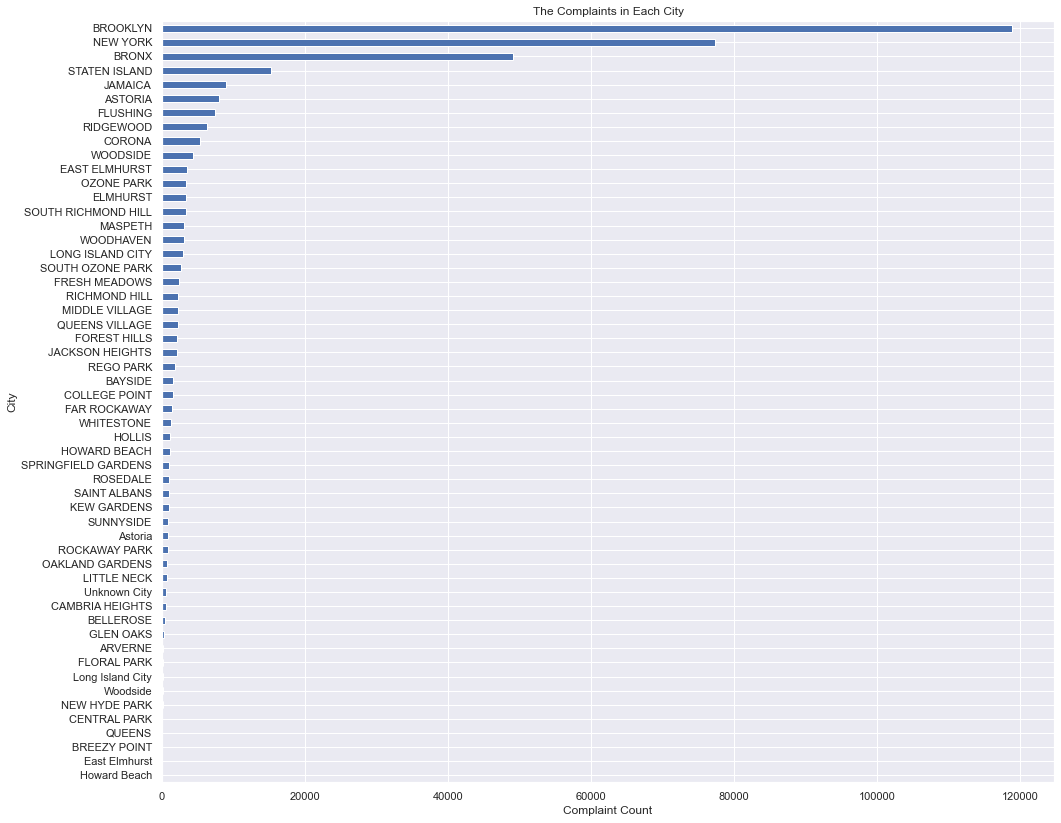

In [25]:
sns.set()
dataFrame['City'].value_counts().sort_values(ascending = True).plot(kind = 'barh', figsize=(16,14), title="The Complaints in Each City")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

### Observation:

> - Brooklyn and New York have the highest number of complaints.

> - 2.3.7 Create a scatter and hexbin plot of the concentration of 
complaints across Brooklyn


In [26]:
brooklyn_data = dataFrame[dataFrame['City']=='BROOKLYN']

In [27]:
brooklyn_data.describe()

,Unique_Key,Incident_Zip,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),School_or_Citywide_Complaint,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Garage_Lot_Name,Latitude,Longitude,Request_elapsed_time
count,1.188490e+05,118849.000000,1.186320e+05,118632.000000,0.0,0.0,0.0,0.0,0.0,118632.000000,118632.000000,1.188490e+05
mean,3.107870e+07,11220.182307,9.962005e+05,177931.740643,NaN,NaN,NaN,NaN,NaN,40.655044,-73.956924,1.419648e+04
std,7.364224e+05,12.092920,1.004511e+04,13499.907865,NaN,NaN,NaN,NaN,NaN,0.037051,0.036208,1.936991e+04
min,2.960737e+07,10023.000000,9.727760e+05,147497.000000,NaN,NaN,NaN,NaN,NaN,40.571521,-74.041335,1.320000e+02
25%,3.050851e+07,11210.000000,9.890530e+05,167450.000000,NaN,NaN,NaN,NaN,NaN,40.626282,-73.982680,4.448000e+03
50%,3.110020e+07,11219.000000,9.961920e+05,177939.000000,NaN,NaN,NaN,NaN,NaN,40.655060,-73.956956,9.385000e+03
75%,3.169839e+07,11230.000000,1.002480e+06,188587.000000,NaN,NaN,NaN,NaN,NaN,40.684260,-73.934250,1.839300e+04
max,3.231064e+07,11414.000000,1.024267e+06,223235.000000,NaN,NaN,NaN,NaN,NaN,40.779404,-73.855758,2.134342e+06


> - Scatter Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


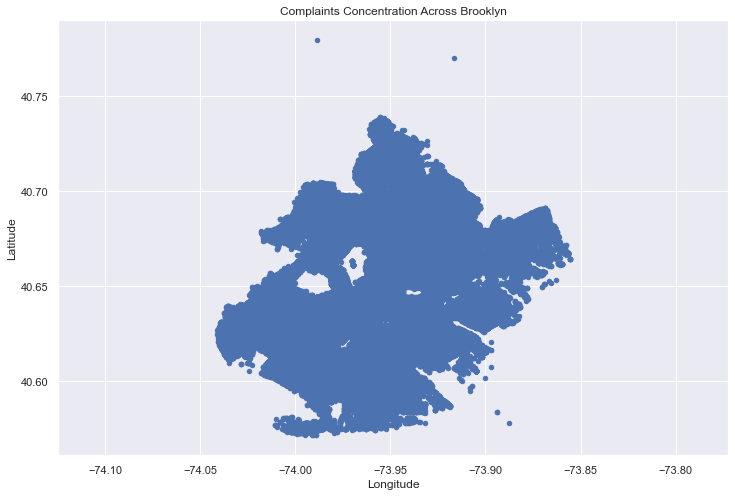

In [28]:
brooklyn_data[['Longitude', 'Latitude']].plot(kind='scatter', 
                                         x='Longitude', 
                                         y='Latitude', 
                                         figsize=(12,8), 
                                         title = 'Complaints Concentration Across Brooklyn'
                                        ).axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show();

### Observations:
> * The scatter plot is inconclusive as it is just one color 
> * The hexbin plot is a better indicator of the concentration of complaints in this scenario

> - Hexbin Plot

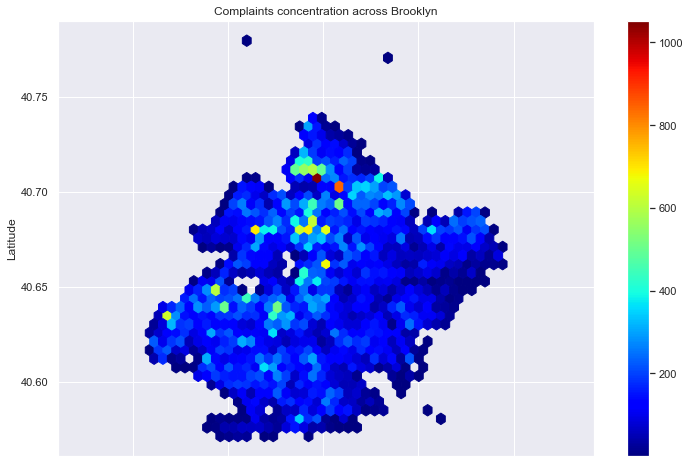

In [29]:
brooklyn_data.plot(kind='hexbin', 
              x='Longitude', 
              y='Latitude', 
              gridsize=40,
              colormap = 'jet',
              mincnt=1,
              title = 'Complaints concentration across Brooklyn',
              figsize=(12,8)
             ).axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Observations:
> - The red color indicates that Brooklyn has the highest number of complaints.
> - As we go down the color scale, from red to blue, the number of complaints decreases.

# 3. Find major types of complaints:

> - 3.1 Plot a bar graph to show the types of complaints

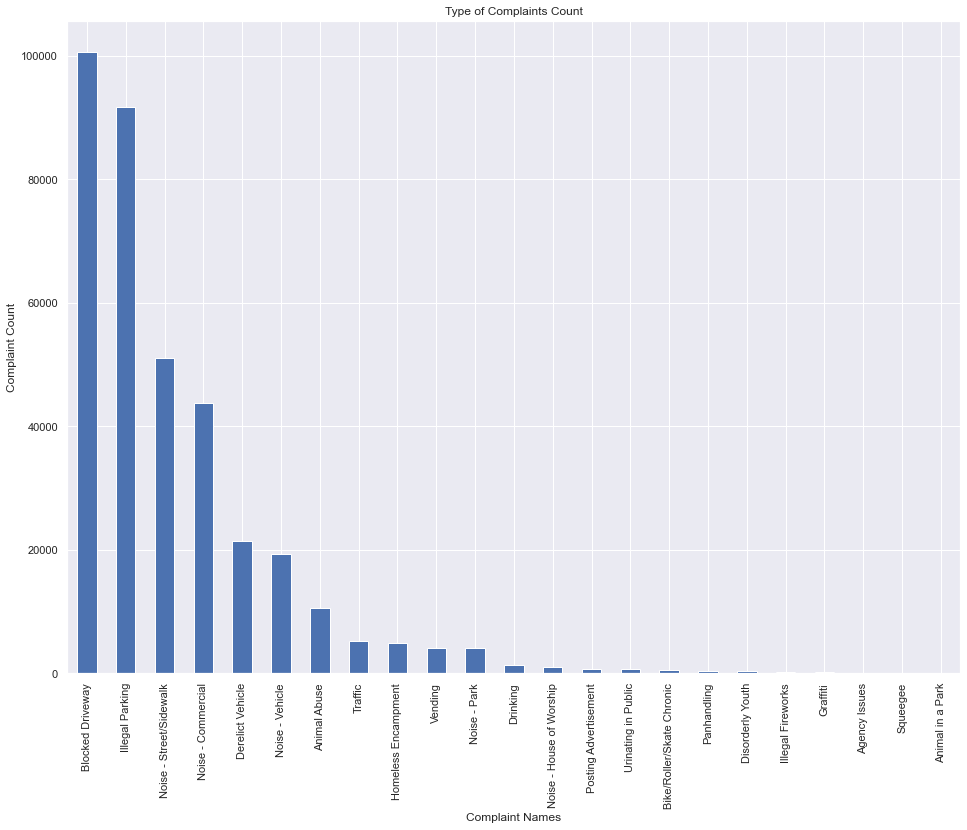

In [30]:
sns.set()
dataFrame['Complaint_Type'].value_counts().plot(kind='bar', figsize=(16,12), title="Type of Complaints Count")
plt.xlabel('Complaint Names')
plt.ylabel('Complaint Count')
plt.show();

### Observation:
> - Most complaints are of blocked driveways and illegal parking.

> - 3.2 Check the frequency of various types of complaints for New York City


In [31]:
dataFrame['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown City',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [32]:
dataFrame[dataFrame['City'] == 'NEW YORK']['Complaint_Type'].value_counts()

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint_Type, dtype: int64

> - 3.3 Find the top 10 complaint types

In [33]:
dataFrame['Complaint_Type'].value_counts()[0:10]

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint_Type, dtype: int64

In [34]:
top10_complaints= np.array(dataFrame['Complaint_Type'].value_counts()[0:10].index)
top10_complaints

array(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle',
       'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Vending'],
      dtype=object)

# Display the various types of complaints in each city
> - 3.5 Create a DataFrame, df_new, which contains cities as columns and 
complaint types in rows


In [35]:
df_new = pd.DataFrame()

In [36]:
for i in dataFrame['City'].unique():
    df_new[i] = dataFrame.loc[dataFrame["City"] == i]['Complaint_Type'].value_counts()

In [37]:
df_new.head()

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,...,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
Noise - Street/Sidewalk,22245,409.0,9144.0,228.0,13982.0,13.0,238.0,38.0,64.0,81.0,...,3.0,NaN,105.0,1.0,6.0,145.0,28.0,5.0,NaN,NaN
Noise - Commercial,18686,1653.0,2944.0,85.0,13855.0,203.0,619.0,13.0,82.0,36.0,...,3.0,4.0,NaN,4.0,6.0,310.0,19.0,2.0,NaN,NaN
Illegal Parking,14549,1340.0,9889.0,760.0,33532.0,276.0,240.0,1104.0,640.0,237.0,...,72.0,32.0,5.0,16.0,10.0,277.0,64.0,124.0,28.0,NaN
Noise - Vehicle,6294,236.0,3556.0,69.0,5965.0,23.0,75.0,45.0,60.0,50.0,...,2.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
Homeless Encampment,3060,32.0,275.0,34.0,948.0,5.0,11.0,5.0,6.0,11.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


# 4. Visualize the major types of complaints in each city
> - 4.1 Draw another chart that shows the types of complaints in each city in a 
single chart, where different colors show the different types of 
complaints


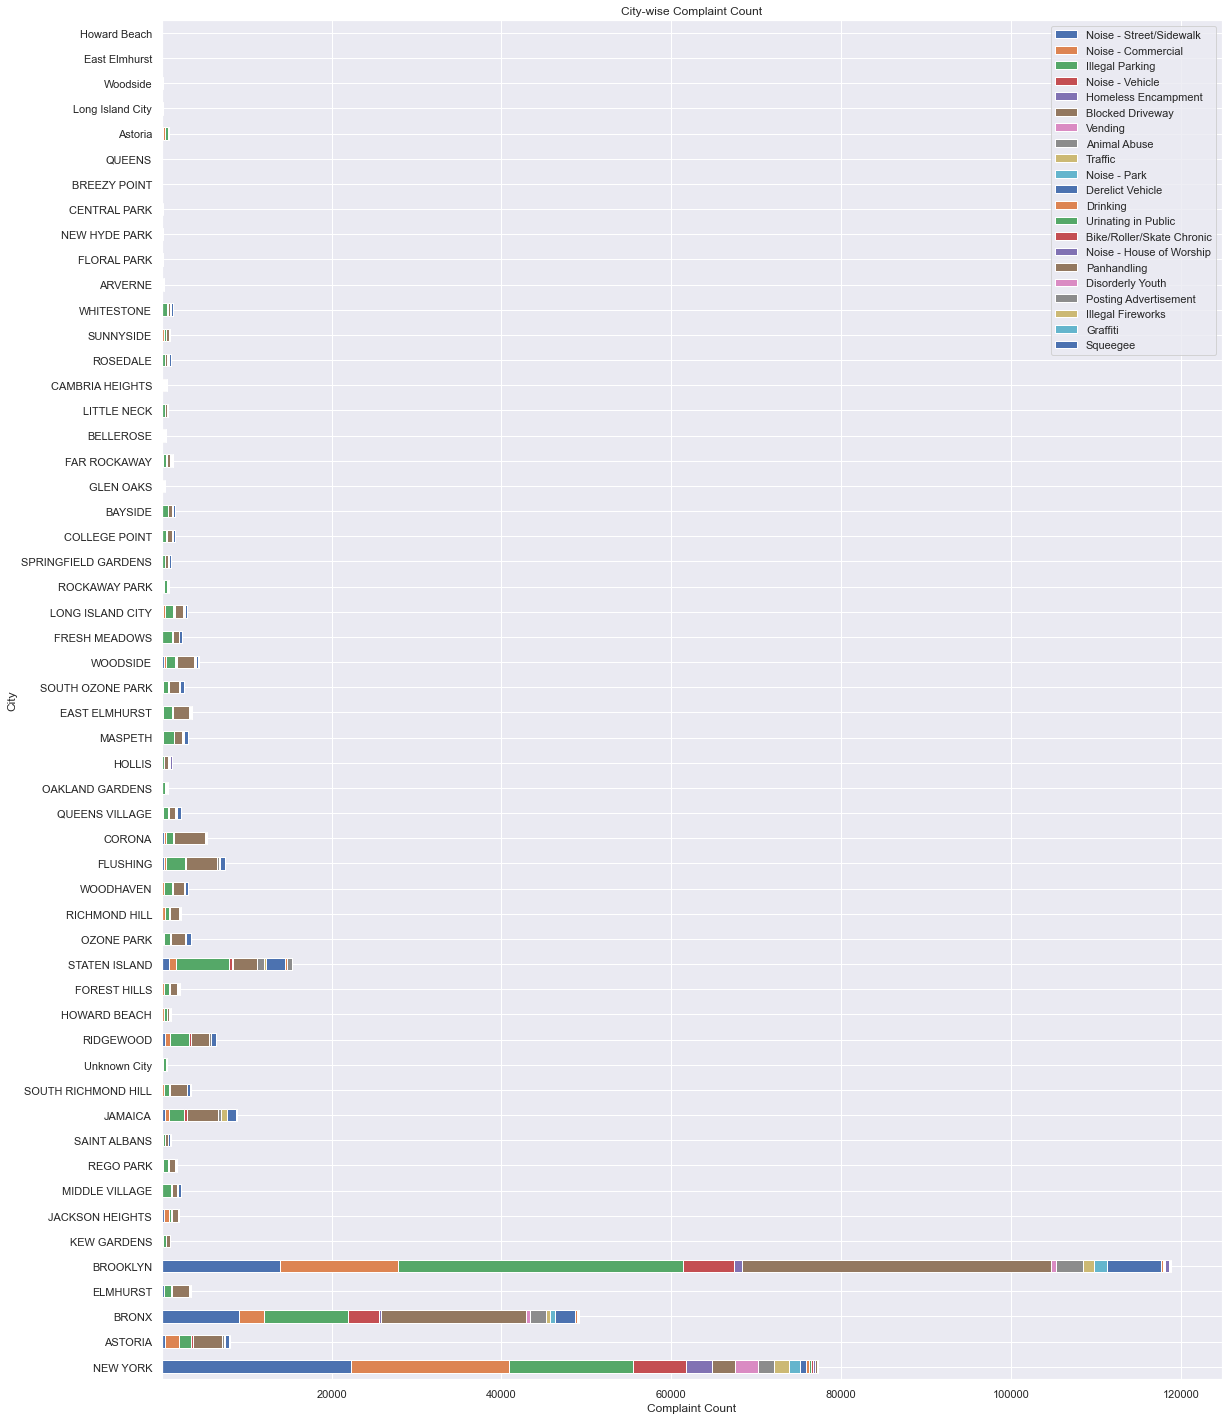

In [38]:
sns.set()
df_new.T.plot(kind= 'barh', stacked= True, figsize= (19, 25), title="City-wise Complaint Count")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

### Observations:

> - The above graph indicates different colors for various types of complaints in a city.
> - You can see that Brookyn has the highest crime rate with Blocked Driveaway having the maximum occurance shown in brown.

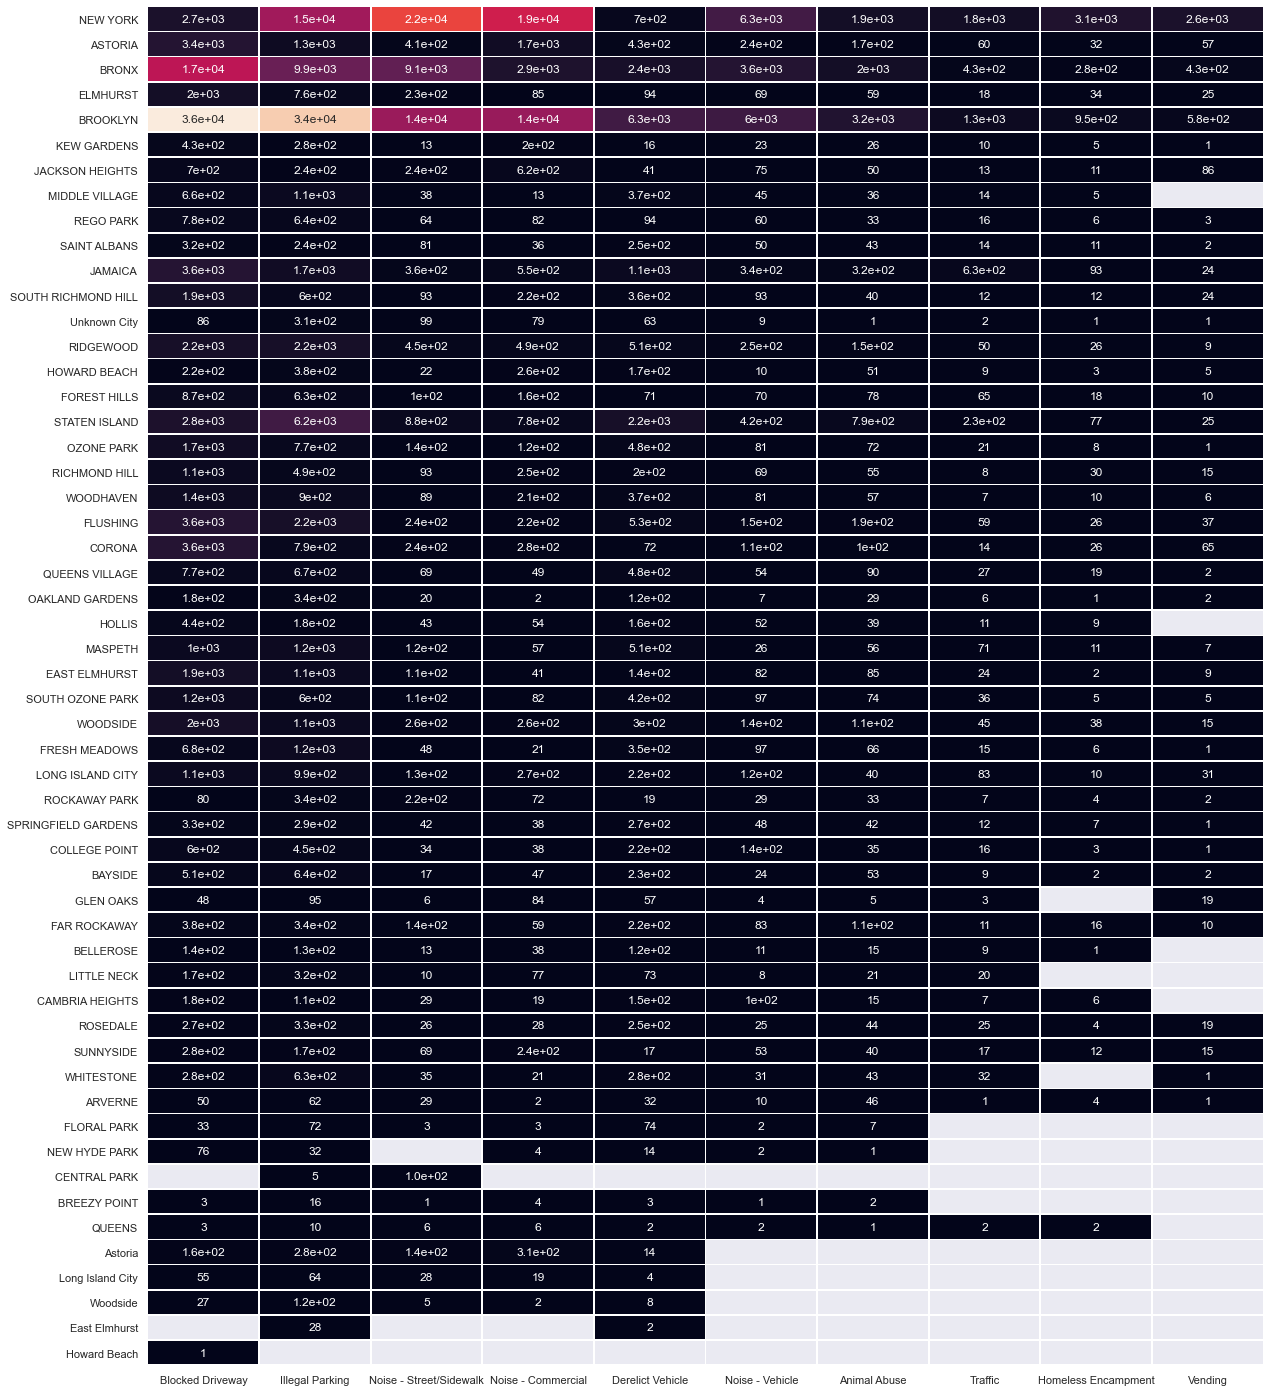

In [39]:
df_new_T= df_new.T
sns.set()
f, ax = plt.subplots(figsize=(20, 25))
sns.heatmap(df_new_T[top10_complaints], annot=True, cbar=False, linewidths=.8, ax=ax)
plt.show()

### Observations:
> - When we map Brooklyn with the Blocked Driveaway, "we see that the color for that combination is light".
> - This means that light color "shows the maximum correlation between two entities".
> - As we go up (dark) in the scale of color, the correlation is minimum.
> - Blank spaces show the absence of that complaint type in a particular city.

- Sort the complaint types based on the average `Request_Closing_Time` grouping them for different locations.

In [40]:
dataFrame.groupby(['City', 'Complaint_Type'], sort= True).Request_elapsed_time.mean()

City      Complaint_Type         
ARVERNE   Animal Abuse                8399.195652
          Blocked Driveway            8318.840000
          Derelict Vehicle           11394.000000
          Disorderly Youth           12928.500000
          Drinking                     859.000000
                                         ...     
Woodside  Blocked Driveway           15566.185185
          Derelict Vehicle           19994.500000
          Illegal Parking            17293.459677
          Noise - Commercial          8619.000000
          Noise - Street/Sidewalk    12285.600000
Name: Request_elapsed_time, Length: 792, dtype: float64

# See whether the average response time across different complaint types is similar (overall)
> - 5.1 Visualize the average of Request_Closing_Time


In [41]:
dataFrame.groupby(['Complaint_Type'], sort= True).Request_elapsed_time.mean()

Complaint_Type
Agency Issues                1.828912e+04
Animal Abuse                 1.803256e+04
Animal in a Park             1.212634e+06
Bike/Roller/Skate Chronic    1.312369e+04
Blocked Driveway             1.623252e+04
Derelict Vehicle             2.535960e+04
Disorderly Youth             1.236375e+04
Drinking                     1.382130e+04
Graffiti                     2.327634e+04
Homeless Encampment          1.545138e+04
Illegal Fireworks            1.011348e+04
Illegal Parking              1.565044e+04
Noise - Commercial           1.108576e+04
Noise - House of Worship     1.139109e+04
Noise - Park                 1.222606e+04
Noise - Street/Sidewalk      1.223130e+04
Noise - Vehicle              1.256180e+04
Panhandling                  1.585355e+04
Posting Advertisement        7.286256e+03
Squeegee                     1.456025e+04
Traffic                      1.230912e+04
Urinating in Public          1.295929e+04
Vending                      1.436628e+04
Name: Request_elaps

In [42]:
dataFrame.Request_elapsed_time.describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_elapsed_time, dtype: float64

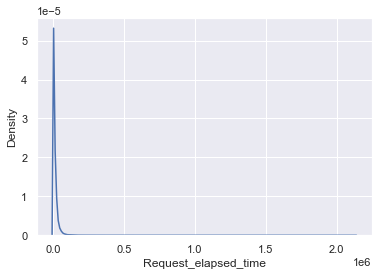

In [43]:
sns.set()
sns.distplot(dataFrame.Request_elapsed_time, hist= False)
plt.show();

# 6. Identify the significant variables by performing statistical analysis using p-values

In [44]:
#Check for nomality of Age
# Shapiro- Wilk Test
from scipy.stats import shapiro
stat, p= shapiro(dataFrame.Request_elapsed_time)
print(stat, p)

0.5136188268661499 0.0


# CE Review
---
### Observation:
> - If the P value (0.0) returned is less than 0.05, then the null hypothesis is rejected and there is evidence that the data is not from a normally distributed population. Now let's check for QQ Plots.
---

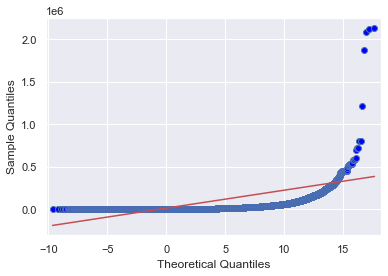

In [45]:
import statsmodels.api as sm
import pylab
sm.qqplot(dataFrame.Request_elapsed_time, loc = 4, scale = 3, line='s')
pylab.show()

### Observations:
> - *This QQ plot shows that that age column is not normally distributed*. 
> - To check whether the average response time across complaint types is similar or not (overall), we have to use a non-parametric test, i.e., the Kruskal-Wallis test.
---

### Kruskal Wallis  H Test
- *__Fail to Reject H0:__ All sample distributions are equal.*
- *__Reject H0:__ One or more sample distributions are not equal.*


In [46]:
Complaint_Types= dataFrame.Complaint_Type.unique()

In [47]:
len(Complaint_Types)

23

In [48]:
new= []
for i in Complaint_Types:
  new.append(dataFrame.loc[dataFrame['Complaint_Type']== i]['Request_elapsed_time'].ravel())

In [49]:
new[20]

array([27090., 37381.,  9736., 24686.,  4073., 10628., 30818.,  1901.])

In [50]:
from scipy.stats import kruskal
# compare samples
stat, p = kruskal(new[0],new[1], new[2],new[3], new[4], new[5], new[6], new[7], new[8], new[9], new[10], new[11], new[12], new[13], new[14], new[15], new[16], new[17], new[18], new[19],new[20], new[21], new[22])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=11988.269, p=0.000
Different distributions (reject H0)


### Observation:
- *So,  we reject the H0, that means average response time across complaint types are not similar*